## Import the necessary libraries:

In [1]:
# Import libraries here
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score, confusion_matrix

## Load the dataset using pandas:

In [2]:
# Load the dataset from the CSV file
df = pd.read_csv('diabetes.csv')

# Display the first few rows of the dataset
print(df.head())
print("_____________________________________________________________________________________________________________")
print("")
# Get information about the dataset
print(df.info())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
_____________________________________________________________________________________________________________

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --

In [3]:
# print the number of missing values within the dataset
print("Number of Missing Values:")
print("-------------------------")
for col in df.columns:
    missing_row = df.loc[df[col] == 0].shape[0]
    print(col + ": " + str(missing_row))
print("")

Number of Missing Values:
-------------------------
Pregnancies: 111
Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11
DiabetesPedigreeFunction: 0
Age: 0
Outcome: 500



In [4]:
# replace missing values with 'NaN'
print("Replacing values of '0' with 'NaN'...")
for col in df.columns:
    if col != 'Outcome':
        if col != 'Pregnancies':
            df[col] = df[col].replace(0, np.NaN)
print("")

Replacing values of '0' with 'NaN'...



In [5]:
# confirm that these columns no longer have values of zero
print("Number of Entries Equal to Zero:")
print("-------------------------")
for col in df.columns:
    missing_row = df.loc[df[col] == 0].shape[0]
    print(col + ": " + str(missing_row))
print("")

Number of Entries Equal to Zero:
-------------------------
Pregnancies: 111
Glucose: 0
BloodPressure: 0
SkinThickness: 0
Insulin: 0
BMI: 0
DiabetesPedigreeFunction: 0
Age: 0
Outcome: 500



In [6]:
# Check for missing values
df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [7]:
# replace 'NaN' values with the mean of non-missing values
print("Replacing 'NaN' values with the mean of non-missing values...")
for col in df.columns:
    if col != 'Outcome':
        if col != 'Pregnancies':
            df[col] = df[col].fillna(df[col].mean())
print("")

Replacing 'NaN' values with the mean of non-missing values...



In [8]:
# Check for missing values
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
# Check for duplicated values
df.duplicated().sum()

0

## Statistical Summary of Data

In [10]:
# Check the statistical summary of the dataset
print("Statistical Summary:")
print("--------------------")
print(df.describe())

Statistical Summary:
--------------------
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.686763      72.405184      29.153420  155.548223   
std       3.369578   30.435949      12.096346       8.790942   85.021108   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      25.000000  121.500000   
50%       3.000000  117.000000      72.202592      29.153420  155.548223   
75%       6.000000  140.250000      80.000000      32.000000  155.548223   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.457464                  0.471876   33.240885    0.348958  
std      6.875151                  0.331329   11.760232    0.47

## Hypotheses

- People with high blood pressure have a higher dose of insulin.
- People with high insulin will have higher blood sugar levels.

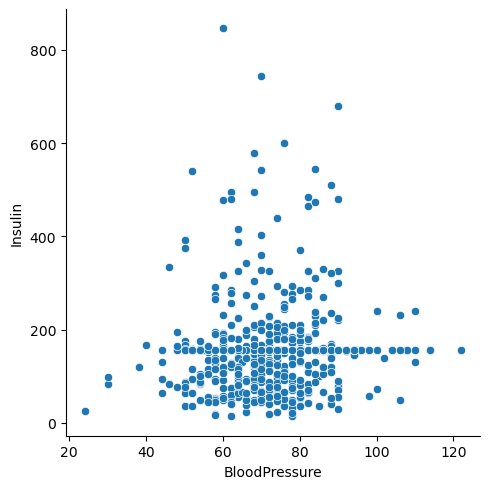

In [11]:
sns.relplot(x="BloodPressure", y="Insulin", data = df)

## Correlation Matrix

<Axes: >

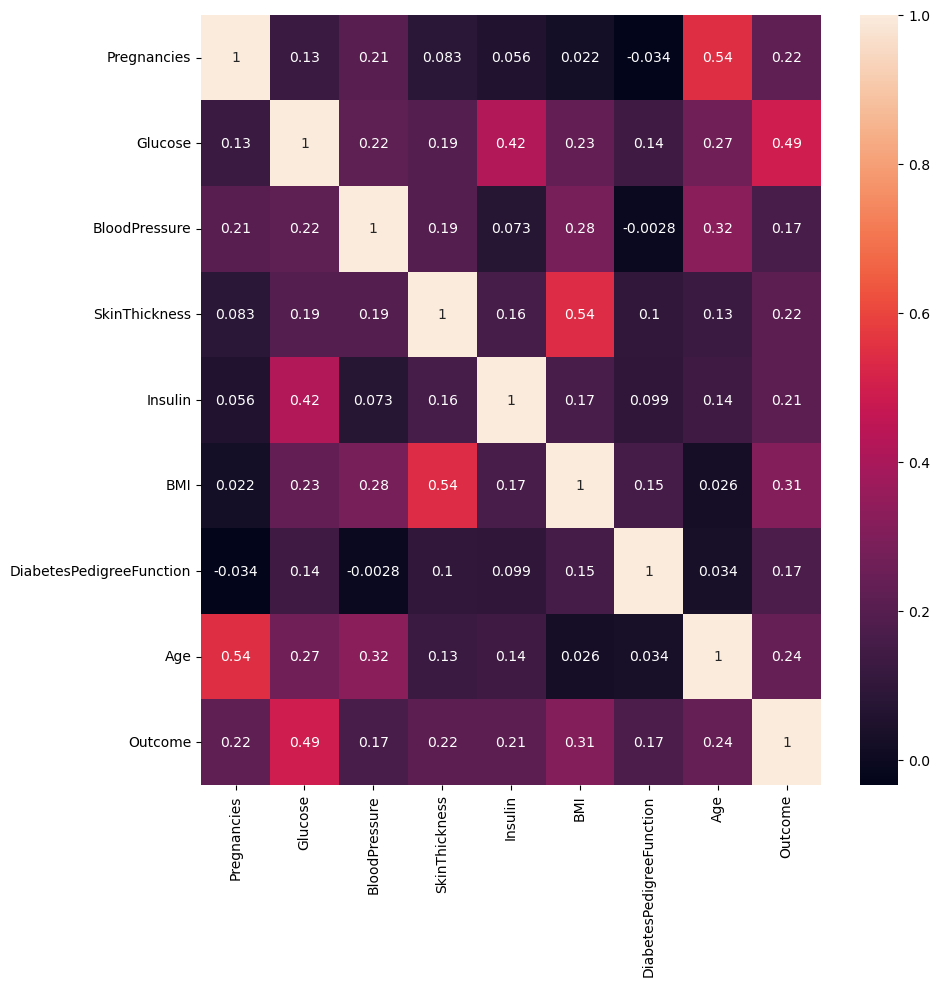

In [12]:
# Create correlation matrix
correlation = df.select_dtypes("number").corr()
# Plot heatmap of `correlation`
plt.figure(figsize=(10,10))
sns.heatmap(correlation, annot=True)

## Histograms

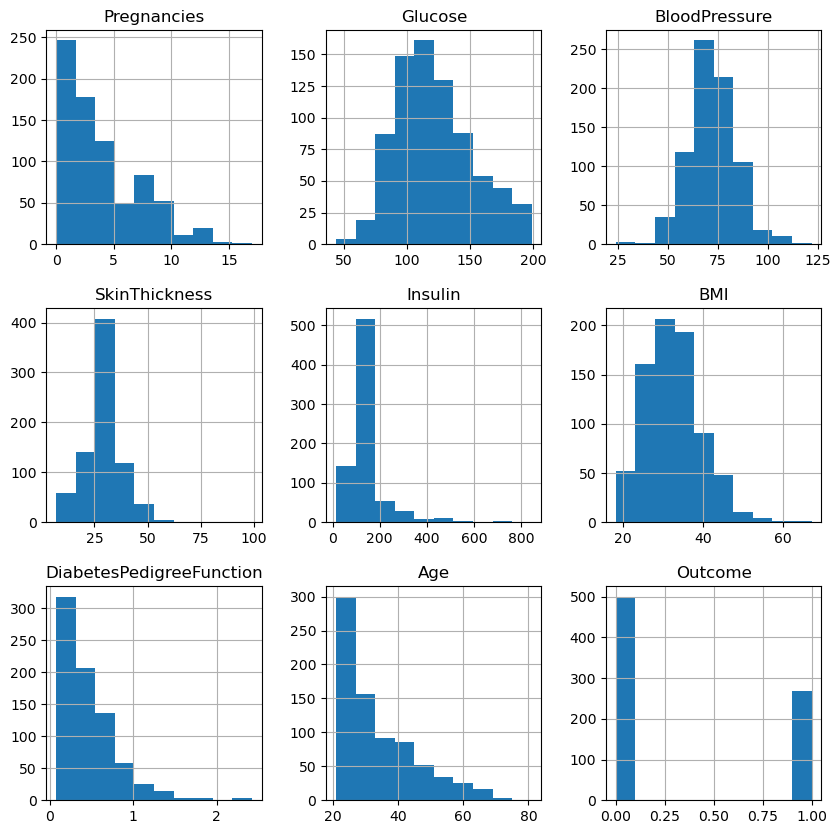

In [13]:
# plot histogram
df.hist(figsize=(10, 10))
plt.show()

Note: 'outcome' refers to whether an individual does, or does not, have diabetes

### Insights
- The majority of data was collected from individuals between the ages of 20 and 30 years
- BMI, Blood Pressure, and Glucose are normally distributed
    - This is expected when collecting these statistics from the population
- It is impossible for BMI, Blood Pressure, and Glucose to have a value of zero
    - Missing or incomplete data?
- Some individuals have up to 15 pregnancies
    - Although this information is not unlikely, it still needs to be taken into account
- This data set indicates that 35% of the population has diabetes (65% does not have it)
    - The World Health Organization estimates that only 8.5% of the world's population suffers from diabetes

## Density Plots

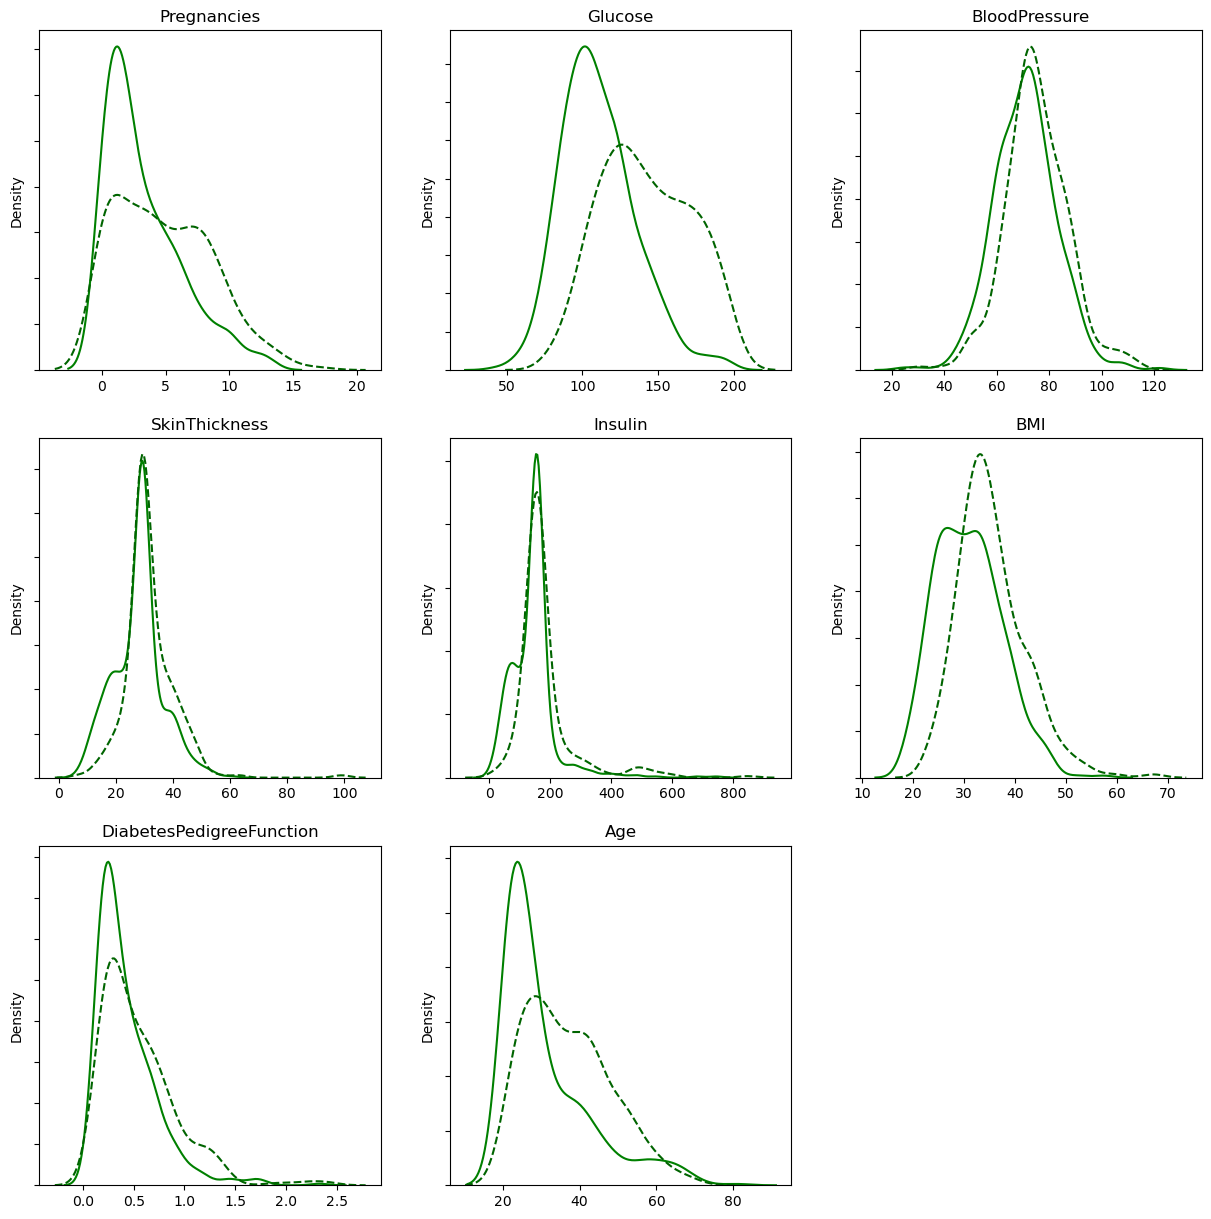

In [14]:
# create 3x3 subplot
plt.subplots(3, 3, figsize=(15,15))

# plot density plot for each variable
for idx, col in enumerate(df.columns):
    ax = plt.subplot(3, 3, idx + 1)
    ax.yaxis.set_ticklabels([])

    sns.distplot(df.loc[df.Outcome == 0][col], hist=False, axlabel=False, 
                 kde_kws={'linestyle':'-', 'color':'green', 'label':"No Diabetes"})
    sns.distplot(df.loc[df.Outcome == 1][col], hist=False, axlabel=False, 
                 kde_kws={'linestyle':'--', 'color':'darkgreen', 'label':"Diabetes"})

    ax.set_title(col)

# hide ninth subplot
plt.subplot(3, 3, 9).set_visible(False)

plt.show()

### Insights

- Glucose, BMI and Age appear to be the strongest predictive values for diabetes
- Blood Pressure and SkinThickness do not appear to have a significant relationship with the distribution of individuals with and without diabetes.

## Separate the independent variables (several medical predictor variables) 

## and the dependent variable (Outcome):

In [15]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (768, 8)
y shape: (768,)


## Split dataset into training and test sets:

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (614, 8)
y_train shape: (614,)
X_test shape: (154, 8)
y_test shape: (154,)


## Define the hyperparameters to tune

In [17]:
hyperparameters = {
    'C': [0.1, 1.0, 10.0],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 500],
    'class_weight': [None, 'balanced']
}

## Train LR model:

In [18]:
# Create the logistic regression model
model = LogisticRegression()

# Perform grid search to find the best combination of hyperparameters
grid_search = GridSearchCV(model, hyperparameters, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Train the model with the best hyperparameters
best_model.fit(X_train, y_train)

LogisticRegression(C=10.0, penalty='l1', solver='liblinear')

## Make predictions on test set:

In [19]:
y_pred = best_model.predict(X_test)

In [20]:
acc_train = accuracy_score(y_train, best_model.predict(X_train))
acc_test = accuracy_score(y_test, best_model.predict(X_test))
#acc_test = model.score(X_test, y_test)

print("Training Accuracy:", round(acc_train, 2))
print("Test Accuracy:", round(acc_test, 2))

Training Accuracy: 0.77
Test Accuracy: 0.75


In [21]:
# Generate probability estimates using a trained model in scikit-learn.
y_train_pred_proba = best_model.predict_proba(X_train)
print(y_train_pred_proba[:5])

[[0.94667393 0.05332607]
 [0.59521091 0.40478909]
 [0.67163503 0.32836497]
 [0.36966876 0.63033124]
 [0.24660903 0.75339097]]


## Evaluate the model's performance:

In [22]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("_____________________________________________________________________________________________________________")
print("")
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Accuracy: 0.7532467532467533
_____________________________________________________________________________________________________________

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154



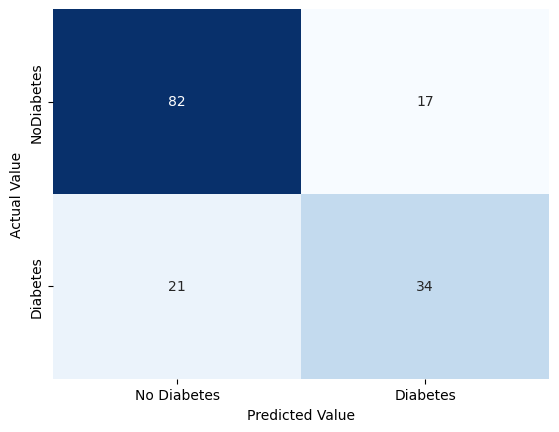

<Figure size 640x480 with 0 Axes>

In [23]:
# confusion matrix
cMatrix = confusion_matrix(y_test, y_pred)

ax = sns.heatmap(cMatrix, annot=True, xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['NoDiabetes', 'Diabetes'], 
                 cbar=False, cmap='Blues')
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actual Value")

plt.show()
plt.clf()

- In the case of diabetes prediction, a false negative is the least desirable outcome because it may lead to patients being told that they will not develop diabetes when in fact they may develop it.

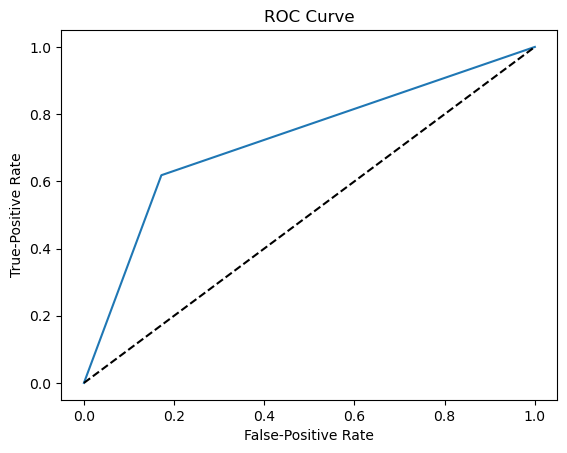

<Figure size 640x480 with 0 Axes>

In [24]:
# ROC curve
FPR, TPR, _ = roc_curve(y_test, y_pred)

plt.plot(FPR, TPR)
plt.plot([0,1], [0,1], '--', color='black')
plt.title('ROC Curve')
plt.xlabel('False-Positive Rate')
plt.ylabel('True-Positive Rate')

plt.show()
plt.clf()

In [25]:
print('Accuracy Rate: {}'.format(np.divide(np.sum([cMatrix[0,0],cMatrix[1,1]]),np.sum(cMatrix))))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cMatrix[0,1],cMatrix[1,0]]),np.sum(cMatrix))))

Accuracy Rate: 0.7532467532467533
Misclassification Rate: 0.24675324675324675


In [26]:
print("Roc Auc Score: {}".format(round(roc_auc_score(y_test,y_pred),5)))

Roc Auc Score: 0.72323
